# Step 3: Apply neural networks

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from config import models_isot_path
from helpers.metrics_plot import classification_summary

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, LSTM, Bidirectional
import pandas as pd
import joblib


## GRU

In [2]:
news = pd.read_csv("../data/isot_news.csv")

max_words = 20000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(news['text'])

sequences = tokenizer.texts_to_sequences(news['text'])
X = pad_sequences(sequences, maxlen=max_len)

y = news['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
joblib.dump(tokenizer, f'../{models_isot_path}/tokenizer_isot.joblib')


['../models/isot/tokenizer_isot.joblib']

In [4]:
gru = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    GRU(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
gru.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = gru.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.9123 - loss: 0.2381 - val_accuracy: 0.9783 - val_loss: 0.0681
Epoch 2/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.9926 - loss: 0.0266 - val_accuracy: 0.9851 - val_loss: 0.0546
Epoch 3/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9951 - loss: 0.0171 - val_accuracy: 0.9806 - val_loss: 0.0621
Epoch 4/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.9981 - loss: 0.0069 - val_accuracy: 0.9822 - val_loss: 0.0648
Epoch 5/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - accuracy: 0.9985 - loss: 0.0051 - val_accuracy: 0.9799 - val_loss: 0.0700
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9882 - loss: 0.0395
Test Accuracy: 0.98796


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.99355   0.97947   0.98646      3458
           1    0.98354   0.99484   0.98916      4265

    accuracy                        0.98796      7723
   macro avg    0.98854   0.98715   0.98781      7723
weighted avg    0.98802   0.98796   0.98795      7723



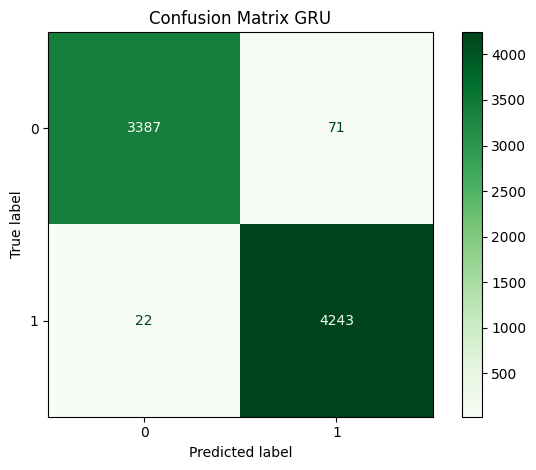

In [6]:
y_pred_probs = gru.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix GRU", cmap="Greens")


In [7]:
gru.save(f"../{models_isot_path}/gru.h5")


## LSTM

In [8]:
lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])


In [9]:
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.9204 - loss: 0.2218 - val_accuracy: 0.9835 - val_loss: 0.0598
Epoch 2/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9799 - val_loss: 0.0815
Epoch 3/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.9934 - loss: 0.0239 - val_accuracy: 0.9815 - val_loss: 0.0761
Epoch 4/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.9959 - loss: 0.0133 - val_accuracy: 0.9770 - val_loss: 0.0729
Epoch 5/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 47s 108ms/step - accuracy: 0.9979 - loss: 0.0078 - val_accuracy: 0.9796 - val_loss: 0.0778
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9830 - loss: 0.0637
Test Accuracy: 0.98252


242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.97868   0.98236   0.98052      3458
           1    0.98565   0.98265   0.98415      4265

    accuracy                        0.98252      7723
   macro avg    0.98217   0.98250   0.98233      7723
weighted avg    0.98253   0.98252   0.98252      7723



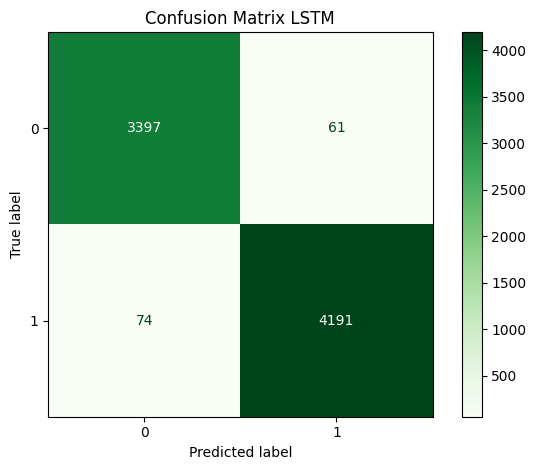

In [11]:
y_pred_probs = lstm.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix LSTM", cmap="Greens")


In [12]:
lstm.save(f"../{models_isot_path}/lstm.h5")


## Bi-LSTM

In [13]:
bi_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(1, activation='sigmoid')
])


In [14]:
bi_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bi_lstm.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
bi_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = bi_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 85s 193ms/step - accuracy: 0.9095 - loss: 0.2364 - val_accuracy: 0.9835 - val_loss: 0.0527
Epoch 2/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 80s 184ms/step - accuracy: 0.9917 - loss: 0.0294 - val_accuracy: 0.9890 - val_loss: 0.0445
Epoch 3/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 84s 192ms/step - accuracy: 0.9956 - loss: 0.0131 - val_accuracy: 0.9773 - val_loss: 0.0974
Epoch 4/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 81s 186ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9819 - val_loss: 0.0790
Epoch 5/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 85s 196ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9767 - val_loss: 0.0708
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9841 - loss: 0.0469
Test Accuracy: 0.98291


242/242 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.97244   0.98988   0.98108      3458
           1    0.99167   0.97726   0.98441      4265

    accuracy                        0.98291      7723
   macro avg    0.98206   0.98357   0.98275      7723
weighted avg    0.98306   0.98291   0.98292      7723



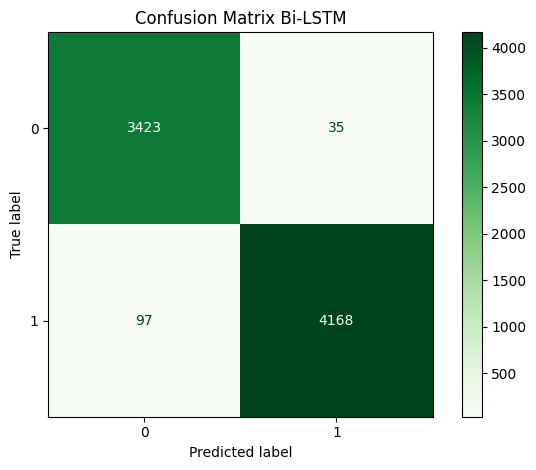

In [16]:
y_pred_probs = bi_lstm.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix Bi-LSTM", cmap="Greens")


In [17]:
bi_lstm.save(f"../{models_isot_path}/bi_lstm.h5")
